#Load data

###Mounting google drive to load devices dataset (train, test)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


##Configs

In [3]:
BASE_PATH = "/content/drive/MyDrive"
DATASET_PATH = os.path.join(BASE_PATH, "devices_dataset")
TRAIN_DATASET_PATH = os.path.join(DATASET_PATH, "devices-train.csv")
TEST_DATASET_PATH = os.path.join(DATASET_PATH, "devices-test.csv")
SEED=123

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [5]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


# Let's do some EDA

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
train_df.isnull().sum()
# From the result below we can tell there is a few null values, let's get rid of them (since they a) since the sample size is relatively small
# As an alternative, various data imputation techniques can be applied to handle the missing values when there are a quit big number missing values.


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
train_df = train_df.dropna()

In [9]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,0.496233,1.522451,0.510799,4.307885,0.520844,32.074335,0.502009,140.263184,4.516323,...,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507,0.760924,0.501758,0.505274,1.499247
std,439.641057,0.500111,0.815499,0.500009,4.339735,0.499691,18.138177,0.288622,35.398777,2.291257,...,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872,0.426626,0.500123,0.500098,1.118539
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# In the dataset there are 3 features (m_dep, sc_h and sc_w) that could be combined together to craft new feature (d_volume)
# crafting new feature.

In [11]:
train_df["d_volume"] = train_df["m_dep"] * train_df["sc_h"] * train_df["sc_w"]

<Axes: >

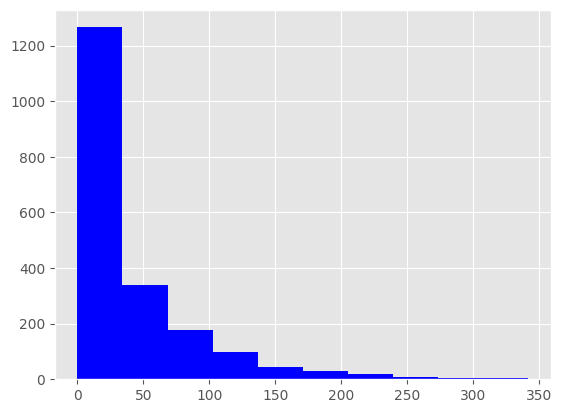

In [12]:
train_df["d_volume"].hist(color="blue")
#The data distribution is skewed to right to handle it, the log transformation will be used (later in the prerocessing section).

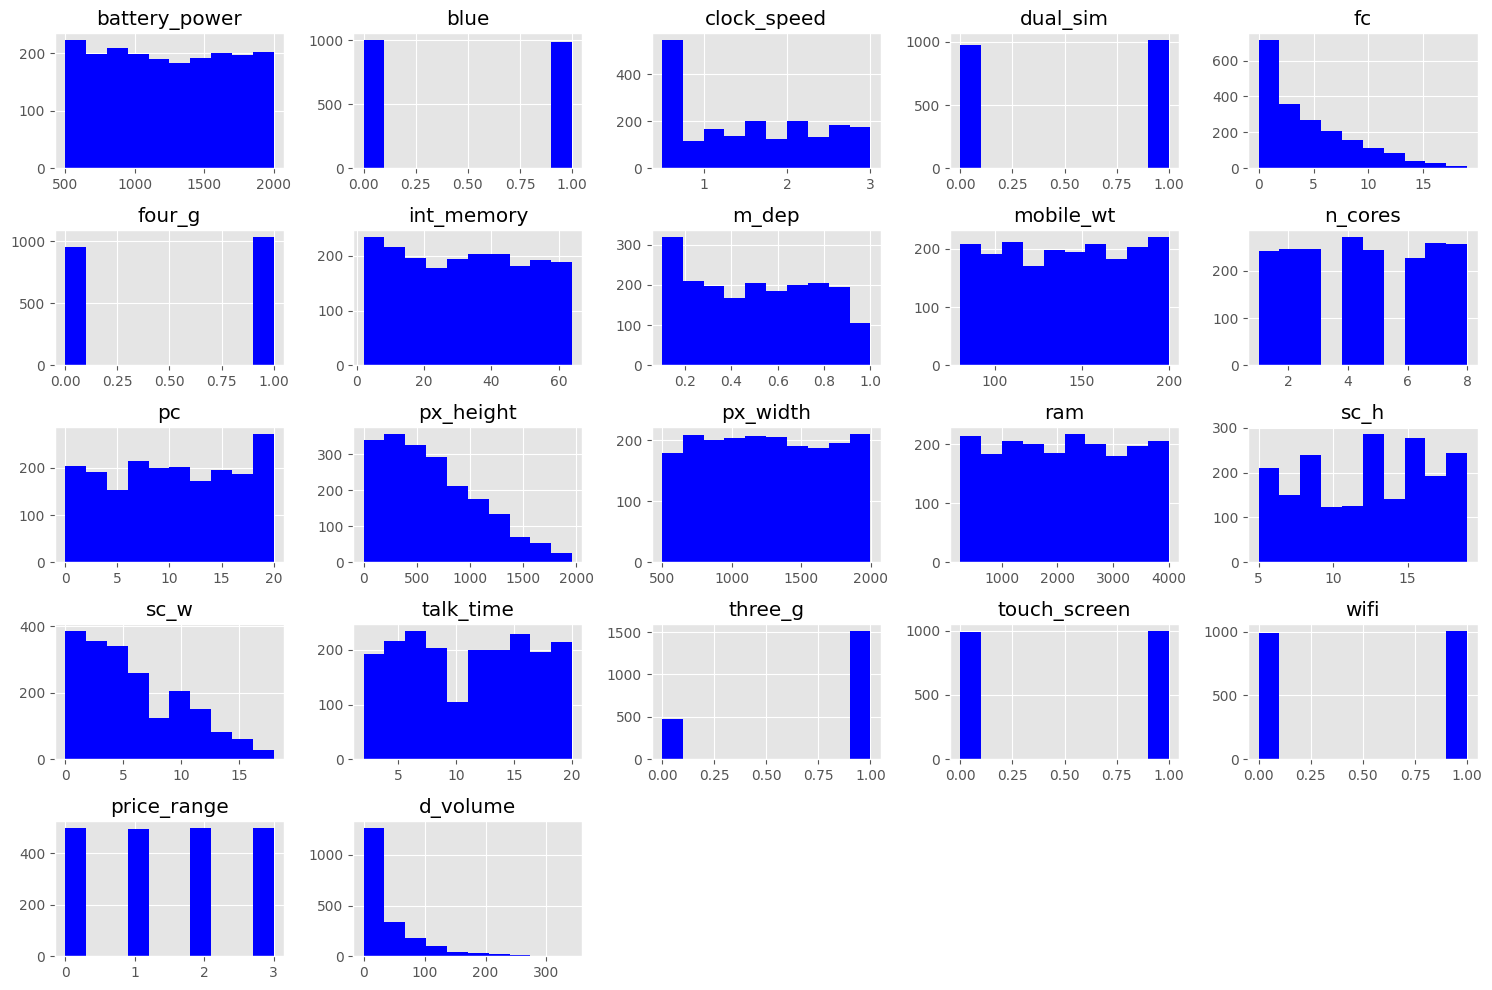

In [13]:
_ = train_df.hist(figsize=(15,10), color='blue')
plt.tight_layout()
# From the figure below we could do log transformation for fc, sc_w, px_height for the same reason that is intrdouced before (d_volume feature)

In [14]:
def viz_correlation(df: pd.DataFrame, cols: list) -> None:
  correlation_matrix = df[cols].corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=1)
  plt.title('Correlation Matrix')
  plt.show()

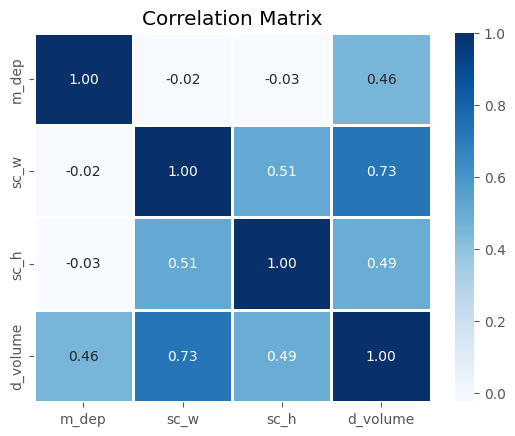

In [15]:
viz_correlation(train_df, ["m_dep", "sc_w", "sc_h", "d_volume"])

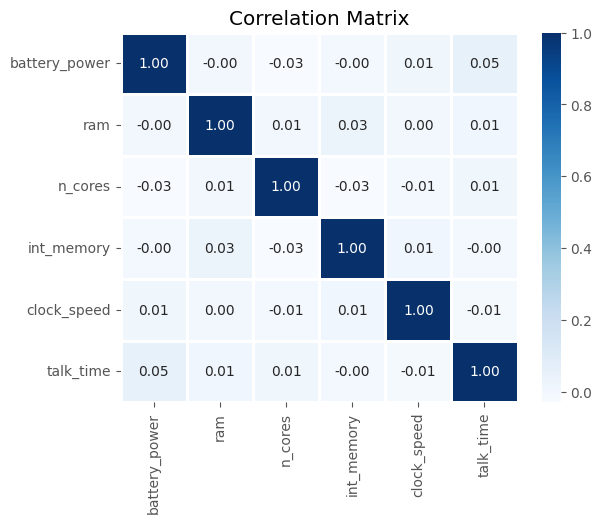

In [16]:
viz_correlation(train_df, ["battery_power", "ram", "n_cores", "int_memory", "clock_speed", "talk_time"]) # No correlation, those features tend to non-linearity

#Preprocess pipline

###Preprocessing

In [17]:
from sklearn.preprocessing import FunctionTransformer

In [18]:
log_transformer = FunctionTransformer(np.log1p, validate=True)
def preprocessing_log_transform(values: np.ndarray) -> np.ndarray:
  return log_transformer.fit_transform(values.reshape(-1, 1))

In [19]:
feature_cols = ["fc", "sc_w", "px_height","d_volume"]
for col in feature_cols:
  data_ = train_df[col].to_numpy()
  data_ = preprocessing_log_transform(data_)
  train_df[col] =  data_.reshape(-1)

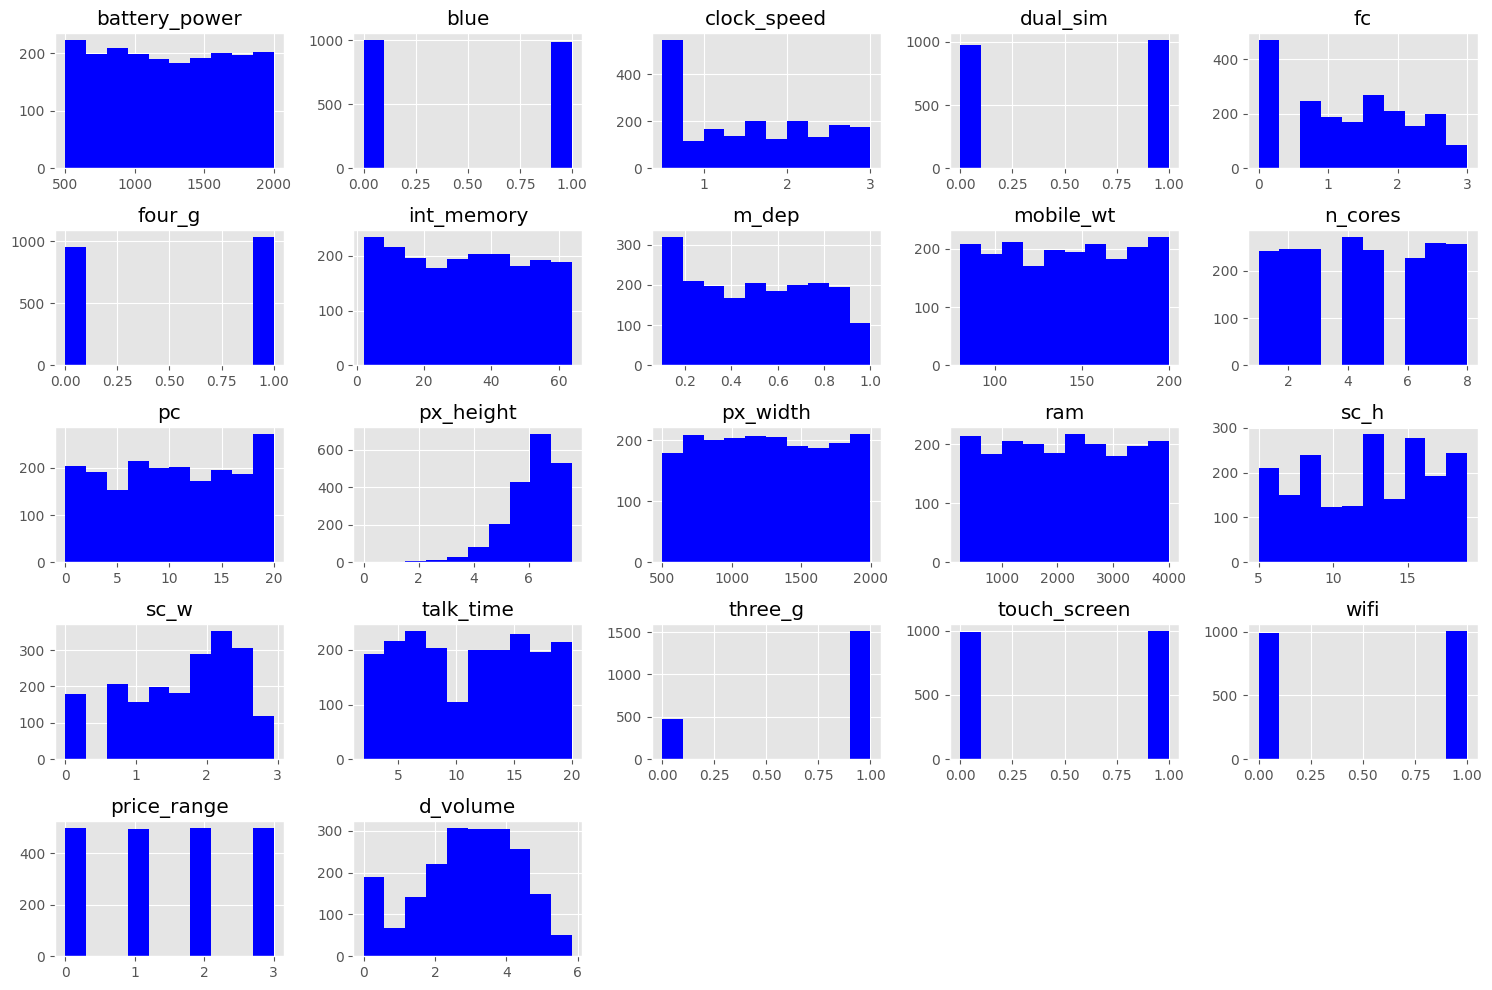

In [20]:
_ = train_df.hist(figsize=(15,10), color='blue')
plt.tight_layout()

###Split data


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y = train_df["price_range"]
X = train_df.drop("price_range", axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Trian

In [24]:
from sklearn.svm import  SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [25]:
X_train.shape, X_test.shape

((1592, 21), (399, 21))

In [26]:
classifier_ = SVC(C=10, random_state=SEED)

In [27]:
classifier_.fit(X_train, y_train)

SVC(C=10, random_state=123)

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
svc_classifier = SVC(probability=True, random_state=42)

voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('ada', ada_classifier), ('svc', svc_classifier)],
    voting='hard'
  )



In [29]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

### Predict

In [30]:
y_pred = classifier_.predict(X_test)

In [31]:
y_pred_voting = voting_classifier.predict(X_test)

### Evaluation

In [32]:
def viz_confusion_matrix_metric(model, X, y):
  disp = ConfusionMatrixDisplay.from_estimator(model, X, y, normalize="true", cmap='Blues')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.grid(False)
  plt.show()

def classification_report_model(model, X, y):
  y_pred = model.predict(X)
  print(classification_report(y, y_pred))

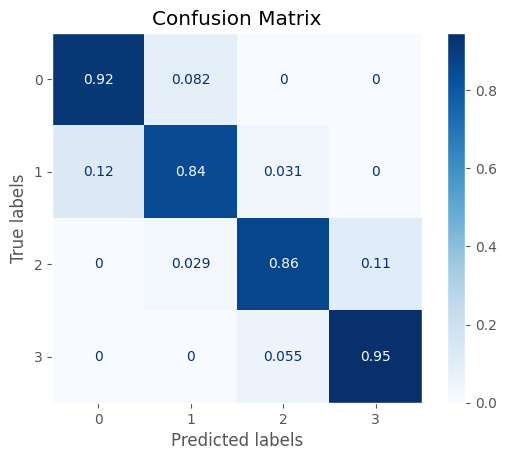

In [33]:
viz_confusion_matrix_metric(classifier_, X_test, y_test)

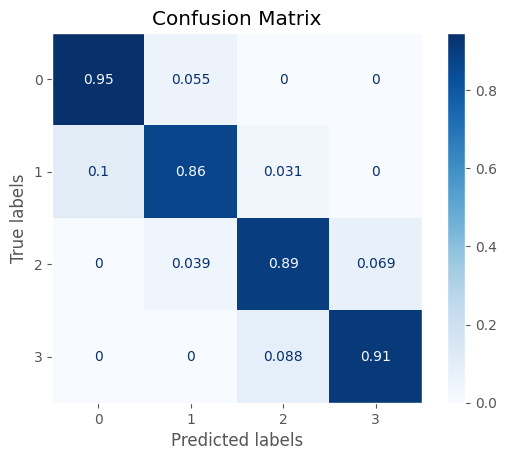

In [34]:
viz_confusion_matrix_metric(voting_classifier, X_test, y_test)

In [35]:
classification_report_model(classifier_,X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       110
           1       0.87      0.84      0.86        96
           2       0.92      0.86      0.89       102
           3       0.89      0.95      0.91        91

    accuracy                           0.89       399
   macro avg       0.89      0.89      0.89       399
weighted avg       0.89      0.89      0.89       399



In [37]:
classification_report_model(voting_classifier, X_test, y_test) # This voting model is slightly better than SVC alone

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       110
           1       0.89      0.86      0.88        96
           2       0.89      0.89      0.89       102
           3       0.92      0.91      0.92        91

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



### Optimization

In [39]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search_svc = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [40]:
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [43]:
grid_search_svc.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

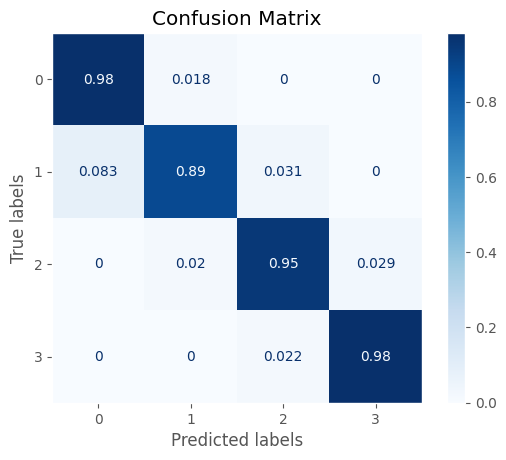

In [41]:
viz_confusion_matrix_metric(grid_search_svc, X_test, y_test)

In [42]:
classification_report_model(grid_search_svc, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       110
           1       0.96      0.89      0.92        96
           2       0.95      0.95      0.95       102
           3       0.97      0.98      0.97        91

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



In [ ]:
# {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
# These params with SVC have high metrics

#Save model

In [45]:
import joblib

In [46]:
joblib.dump(grid_search_svc, "devices_price_model.pkl") #

['devices_price_model.pkl']

#Load model

In [47]:
grid_search_svc = joblib.load("devices_price_model.pkl")

In [48]:
grid_search_svc.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'C': [0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1],
  'kernel': ['rbf', 'linear']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}